#Q1: (Based on Step-by-Step Implementation of Ridge Regression using Gradient Descent Optimization) Generate a dataset with atleast seven highly correlated columns and a target variable. Implement Ridge Regression using Gradient Descent Optimization. Take different values of learning rate (such as 0.0001,0.001,0.01,0.1,1,10) and regularization parameter (10-15,10-10,10-5,10-3,0,1,10,20). Choose the best parameters for which ridge regression cost function is minimum and R2_score is maximum.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import make_regression
samples=500
n_features=10
corelated_features=7
n=n_features-corelated_features
x,y=make_regression(500,n,n_targets=1,random_state=0)
print(x.shape,y.shape)

col=[i for i in range(n_features)]

for i in range(1,corelated_features+1):
    extra=x[:,0]*i
    extra=extra.reshape(-1,1)
    x=np.hstack((x,extra))
print(x.shape)
y/=10



(500, 3) (500,)
(500, 10)


In [ ]:
import random
from sklearn import metrics

def predict(x,beta):
    return np.dot(x,beta)
def lasso_regression_fit(x,y,lam=2,learning_rate=0.01,max_iters=500):
    m,n=x.shape
    #print(m,n)
    beta=np.zeros(n)
    loss=[]
    for i in range(max_iters):
        y_=predict(x,beta)
        loss.append(np.sum((y_-y)**2)/m)
        grad=np.dot(x.T,(y_-y))+lam*beta
        grad=grad/m

        beta=beta-learning_rate*grad
    y_=predict(x,beta)
    r_score=metrics.r2_score(y_,y)
    return beta,loss,r_score

0 0
-325.2117443770171
-303.0083925722935
0 1
-325.2117443770207
-303.00839257229694
0 2
-325.21174478288907
-303.0083929404382
0 3
-325.2117849642259
-303.00842938676846
0 4
-325.2117443770171
-303.0083925722935
0 5
-325.25233354114755
-303.04520873891465
0 6
-325.617812229708
-303.3767066864717
0 7
-326.024271803971
-303.74535968123337
1 0
-1.148705240294579
-1.1561994652828522
1 1
-1.1487052402949822
-1.1561994652832537
1 2
-1.1487052814296086
-1.1561995063575434
1 3
-1.1487093538001605
-1.1562035727546096
1 4
-1.148705240294579
-1.1561994652828522
1 5
-1.1528214242759178
-1.1603095914582986
1 6
-1.1901089603914827
-1.1975404304695063
1 7
-1.2320526570427197
-1.2394164657794828
2 0
0.9999611311750863
0.9999582307178266
2 1
0.9999611311750836
0.9999582307178239
2 2
0.999961130898577
0.9999582304310884
2 3
0.9999611035186451
0.9999582020384532
2 4
0.9999611311750863
0.9999582307178266
2 5
0.9999279165215287
0.9999239542325531
2 6
0.9991272227483907
0.9991102323239712
2 7
0.99717424140

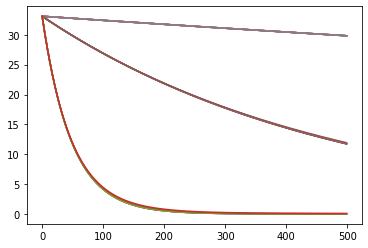

In [ ]:
from sklearn.model_selection import train_test_split
lr=[0.0001,0.001,0.01]
lamb=[10**-15,10**-10,10**-5,10**-3,0,1,10,20]
models=[]
test_acc=[]
err=[]
for i in range(len(lr)):
    for j in range(len(lamb)):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
        #print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
        b,l,acc=lasso_regression_fit(x_train,y_train,lamb[j],lr[i])
        models.append((b,acc,l[-1]))
        err.append(l[-1])
        print(i,j)
        print(acc)
        y_=predict(x_test,b)
        r_score=metrics.r2_score(y_,y_test)
        test_acc.append(r_score)
        print(r_score)
        plt.plot(l)

In [ ]:
# Max accuracy parameters
id=np.argmax(test_acc)
id
print("Best Parameters are")
print("Beta",models[id][0])
print("Accuracy",models[id][1])
print("error",models[id][-1])
np.argmin(err)

Best Parameters are
Beta [3.37322369e-04 1.11783570e+00 5.50813336e+00 3.37322369e-04
 6.74644739e-04 1.01196711e-03 1.34928948e-03 1.68661185e-03
 2.02393422e-03 2.36125659e-03]
Accuracy 0.9999611311750863
error 0.001297328891627682


16

#Q2: (Based on using Inbuilt function of Linear, Ridge, and Lasso Regression)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/assignment 5/Hitters.csv')
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


#(a) Pre-process the data (null values, noise, categorical to numerical encoding)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [ ]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [ ]:
df=df.fillna(df.mean())
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,535.925882,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500000,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.000000,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.000000,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.000000,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.000000,A


In [ ]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [ ]:
df=pd.get_dummies(df,['Division','League','NewLeague'],drop_first=True)
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,Division_N,League_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,535.925882,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.000000,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.000000,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.000000,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.500000,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.000000,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.000000,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.000000,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.000000,0,0,0


In [ ]:
x=df[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Division_N', 'League_W', 'NewLeague_N']].values
y=df[['Salary']].values
print(x.shape,y.shape)

(322, 19) (322, 1)


#(b) Separate input and output features and perform scaling


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(257, 19) (65, 19) (257, 1) (65, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

#(c) Fit a Linear, Ridge (use regularization parameter as 0.5748), and LASSO (use regularization parameter as 0.5748) regression function on the dataset.
#(d) Evaluate the performance of each trained model on test set. Which model performs the best and Why?

In [ ]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.5478)
ls.fit(x_sc,y_train)
ls.score(x_test_sc,y_test)

0.4631147137744423

In [ ]:
ls.coef_

array([-251.92100172,  142.89770316,   25.28806313,   78.00319596,
          6.28278416,  104.34059726,  -48.76039244, -323.88417712,
        259.26907712,    0.        ,  307.33526977,  136.72781554,
       -179.39875045,   60.97882874,   56.75032255,  -43.37455036,
          5.39034575,  -59.91446879,   13.88034962])

In [ ]:
from sklearn.linear_model import Ridge
rd=Ridge(alpha=0.5478)
rd.fit(x_sc,y_train)
rd.score(x_test_sc,y_test)

0.46169097773153905

In [ ]:
rd.coef_

array([[-260.2164203 ,  147.06838602,   26.67298116,   79.97112091,
           6.15961505,  105.79827955,  -55.07398933, -293.79881081,
         233.9378199 ,   -6.77235999,  305.43479226,  149.26716088,
        -183.51433493,   61.56323761,   58.4180051 ,  -45.11106324,
           5.69233273,  -60.47164753,   14.06556062]])

# Q3: Cross Validation for Ridge and Lasso Regression Explore Ridge Cross Validation (RidgeCV) and Lasso Cross Validation (LassoCV) function of Python. Implement both on Boston House Prediction Dataset (load_boston dataset from sklearn.datasets).

In [ ]:
from sklearn.datasets import load_boston
data=load_boston()
x=data['data']
y=data['target']
print(x.shape,y.shape)

(506, 13) (506,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)

In [ ]:
from sklearn.linear_model import LassoCV
ls_cv=LassoCV(alphas=[1e-5,1e-3,1e-1,1])
ls_cv.fit(x,y)
ls_cv.score(x,y)

0.7269834862602695

In [ ]:
ls_cv.coef_

array([-0.09789363,  0.04921111, -0.03661906,  0.95519003, -0.        ,
        3.70320175, -0.01003698, -1.16053834,  0.27470721, -0.01457017,
       -0.77065434,  0.01024917, -0.56876914])

In [ ]:
from sklearn.linear_model import RidgeCV
rd_cv=RidgeCV(alphas=[1e-5,1e-3,1e-1,1])
rd_cv.fit(x,y)
rd_cv.score(x,y)

0.7406426592776543

In [ ]:
rd_cv.coef_

array([-1.08005629e-01,  4.64220833e-02,  2.05100734e-02,  2.68656088e+00,
       -1.77550976e+01,  3.80995607e+00,  6.81938924e-04, -1.47539719e+00,
        3.06022421e-01, -1.23358006e-02, -9.52619515e-01,  9.31235787e-03,
       -5.24771100e-01])